<h1 align=center>Immigration to Canada from 1980 to 2013</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Data Wrangling](#data_wrangling)
    1. [Identify missing values](#missing_v)
    2. [Drop unnecessary data](#drop_data)
2. [Exploratory Data Analysis](#exploratory_da)
    1. [Total Immigration Canada](#total_immigration)
    2. [Immigration to Canada from France](#immigration_france)
    3. [Immigration trend of Top 5 countries](#immigration_top5)
    4. [Immigration trend of Top 2 : China & India](#immigration_ci)
    5. [Immigration trend of Top 10 countries by decades](#immigration_decades)
3. [Geospatial Analysis - Choropleth Map](#geospatial_analysis)
4. [Word Cloud - Maple Leaf](#ml_word_cloud)
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Read excel
df= pd.read_excel('../input/immigration-to-canada-ibm-dataset/Canada.xlsx',
                        sheet_name="Canada by Citizenship",
                        skiprows=range(20),
                        skipfooter=2)

## Data Wrangling<a id="data_wrangling"></a>
### Identify missing values<a id='missing_v'></a>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

As we can see, there are no "null" values in the dataset.

### Drop unnecessary data<a id='drop_data'></a>
<p>We can now clean the dataset : we remove some unnecessary columns and rename some others.</p>

In [3]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

We add a 'Total' column in order to sum up the total immigrants by country over the entire period 1980 - 2013 :

In [4]:
df['Total'] = df.sum(axis=1)

#Years that we will be using in this notebook
years=list(range(1980,2014))

#Set the country name as index.
df.set_index('Country', inplace=True)

df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Exploratory Data Analysis <a id="exploratory_da"></a>

### Total Immigration in Canada<a id='total_immigration'></a>

We create dataframe with the sum of immigration over all the countries :


In [5]:
df_tot = pd.DataFrame(df[years].sum())

#reset index
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


We can now generate the scatter plot :

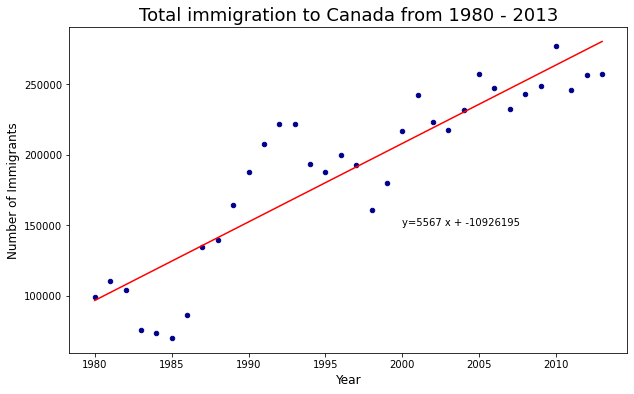

In [6]:
# generate scatter plot
ax = df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Total immigration to Canada from 1980 - 2013',size=18)
plt.xlabel('Year', size=12)
plt.ylabel('Number of Immigrants', size=12)

# plot line of best fit
x = df_tot['year']
fit = np.polyfit(x, df_tot['total'], deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

### Immigration to Canada from France <a id='immigration_france'></a>

<p>As an example, we will plot the immigration from France to Canada during 1980-2013</p> 

In [7]:
df_france = df.loc[['France'],years].transpose()
df_france.head()

Country,France
1980,1729
1981,2027
1982,2219
1983,1490
1984,1169


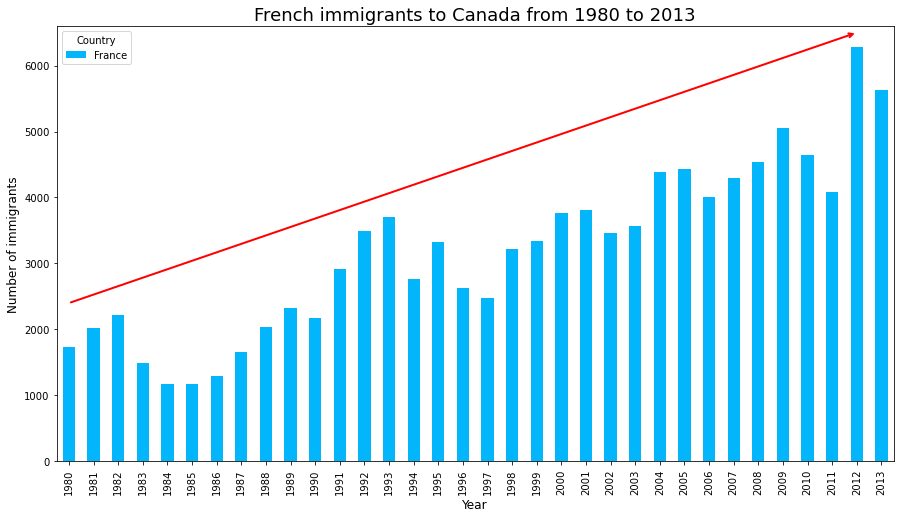

In [8]:
df_france.plot(kind='bar', figsize=(15, 8), color='#03b6fc')

plt.xlabel('Year', size=12)
plt.ylabel('Number of immigrants', size=12)
plt.title('French immigrants to Canada from 1980 to 2013', size=18)

# Annotate arrow
plt.annotate('',                   # s: str. will leave it blank for no text
             xy=(32, 6500),        # head of the arrow
             xytext=(0, 2400),     # base of the arrow
             xycoords='data',      # coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

plt.show()

### Immigration trend of Top 5 countries<a id='immigration_top5'></a>

In [9]:
df.sort_values('Total', ascending=False, inplace=True)
df_top5 = df[years].head(5).transpose()
df_top5.head(10)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


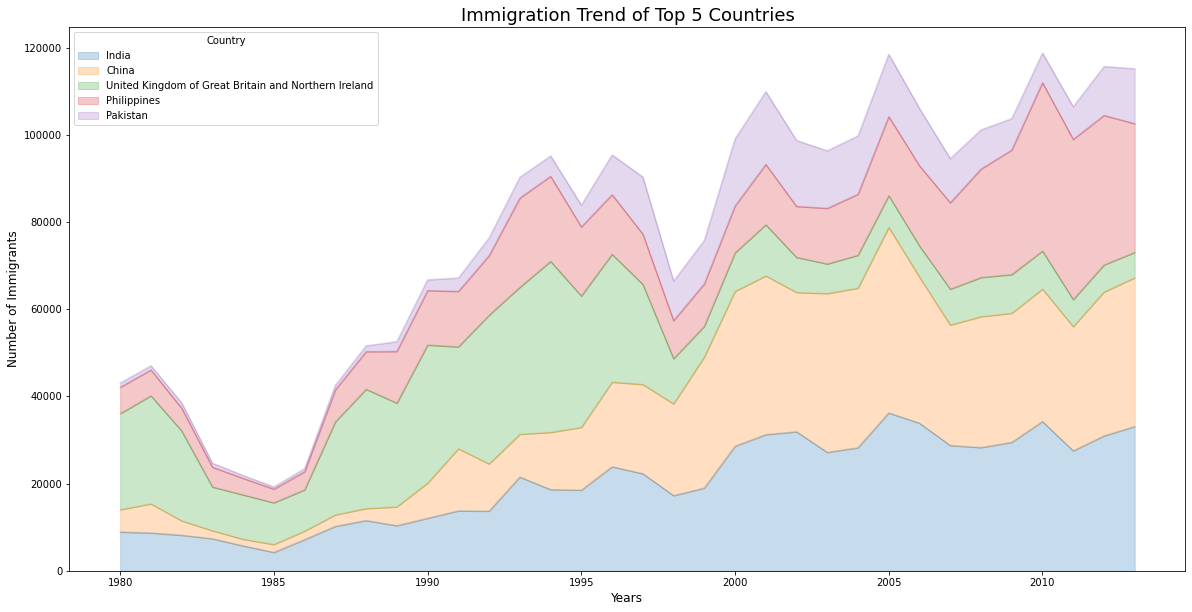

In [10]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries', size=18)
plt.ylabel('Number of Immigrants', size=12)
plt.xlabel('Years', size=12)

plt.show()

### Immigration trend of Top 2 : China & India<a id='immigration_ci'></a>

#### Bubble plot
<p>A bubble chart is a type of chart that displays three dimensions of data. Each entity with its triplet (v1, v2, v3) of associated data is plotted as a disk that expresses two of the vi values through the disk's xy location and the third through its size (https://en.wikipedia.org/wiki/Bubble_chart).</p>
<p>The weight of the bubble is determined by the third variable 'v3'. <br>
In our case, we normalize the data pertaining to China and India using the formula : </p>
 $$ X' = \frac{X-X_{min}}{X_{max}-X_{min}} $$

In [11]:
# Extract data from India and China (Top2)
df_CI = df.loc[['India','China'], years].transpose()
df_CI.reset_index(inplace=True)
df_CI.rename(columns={'index':'Year'},inplace=True)
df_CI.head()

Country,Year,India,China
0,1980,8880,5123
1,1981,8670,6682
2,1982,8147,3308
3,1983,7338,1863
4,1984,5704,1527


In [12]:
#Normalization of the data
norm_china = (df_CI['China'] - df_CI['China'].min()) / (df_CI['China'].max() - df_CI['China'].min())
norm_india = (df_CI['India'] - df_CI['India'].min()) / (df_CI['India'].max() - df_CI['India'].min())

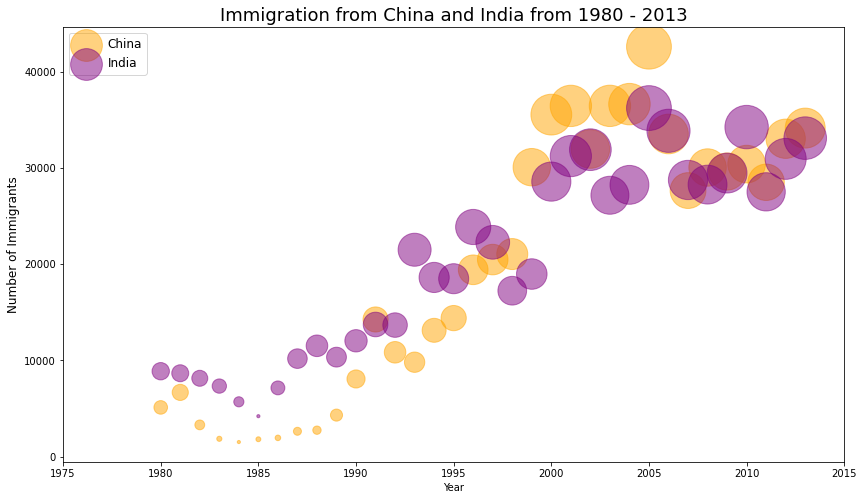

In [13]:
# China
ax0 = df_CI.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='orange',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_CI.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="purple",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants', fontsize=12)
ax0.set_title('Immigration from China and India from 1980 - 2013', fontsize=18)
ax0.legend(['China', 'India'], loc='upper left', fontsize=12)

### Immigration trend of Top 10 countries by decades<a id='immigration_decades'></a>

Get the top 10 countries

In [14]:
df_top10 = df.loc[:,years].head(10)
df_top10.head(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


We create a list of all years in decades : 80's, 90's, and 00's

In [15]:
years_80s = list(range(1980, 1990)) 
years_90s = list(range(1990, 2000)) 
years_00s = list(range(2000, 2010)) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top10.loc[:, years_80s].sum(axis=1) 
df_90s = df_top10.loc[:, years_90s].sum(axis=1) 
df_00s = df_top10.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [16]:
new_df.describe()

,1980s,1990s,2000s
count,10.000000,10.0000,10.000000
mean,55164.100000,109293.3000,130034.800000
std,51005.259272,73125.6123,110230.126938
min,10591.000000,38189.0000,13629.000000
25%,17563.500000,58902.2500,66391.250000
50%,44802.500000,67861.5000,79293.000000
75%,72809.000000,155766.5000,161577.500000
max,179171.000000,261966.0000,340385.000000


Text(0.5, 1.0, 'Immigration from top 15 countries for decades 80s, 90s and 2000s')

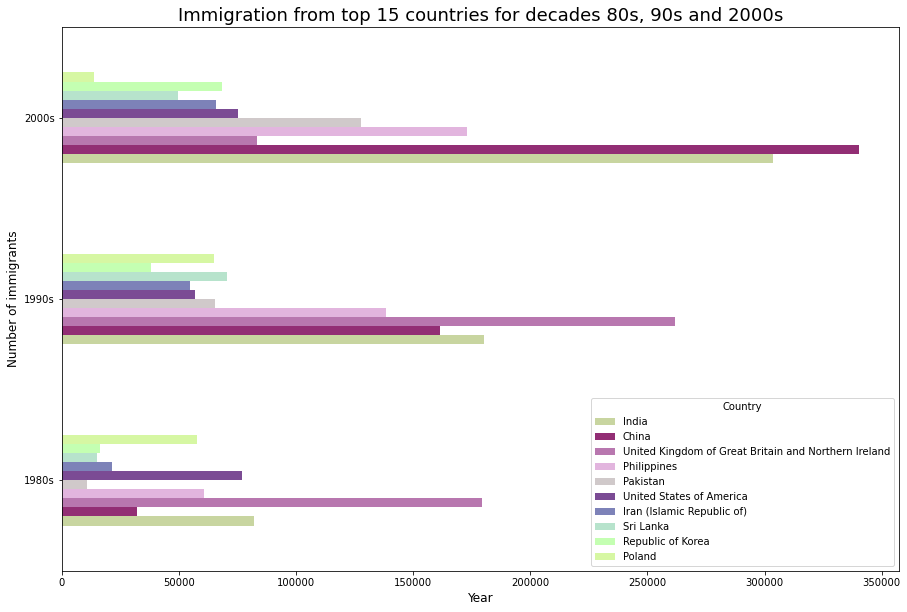

In [17]:
color_list=['#c8d5a0','#922e74','#b877af','#e2b5de','#d0c9ca','#7B4B94','#7D82B8','#B7E3CC','#C4FFB2','#D6F7A3']

new_df.transpose().plot(kind='barh', figsize=(15, 10), color=color_list)

plt.xlabel('Year', size=12)
plt.ylabel('Number of immigrants', size=12)
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s', size=18)

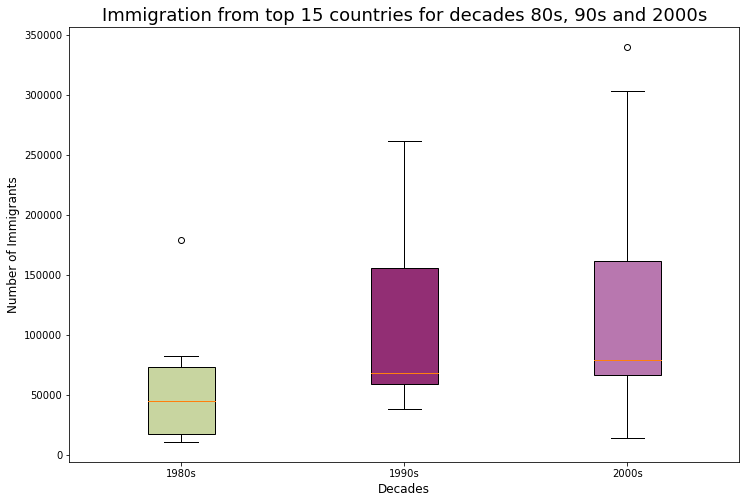

In [18]:
fig = plt.figure(1, figsize=(12,8))

box = plt.boxplot(new_df.transpose(), patch_artist=True)

# fill with colors
colors = ['#c8d5a0','#922e74','#b877af']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)     
          
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s', size=18)
plt.ylabel('Number of Immigrants', size=12)
plt.xlabel('Decades', size=12)
plt.xticks([1, 2, 3], ['1980s','1990s','2000s'])
plt.show()

## Geospatial Analysis - Choropleth Map<a id='geospatial_analysis'></a>

We can do some geospatial analysis using folium library. We first need to download geo_json file :

In [19]:
world_geo = '../input/world-countries/world-countries.json'

In [20]:
# reset the index to select the countries as column
df.reset_index(inplace=True)

world_map = folium.Map(location=[0,0],zoom_start=2)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

/opt/conda/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Word Cloud - Maple Leaf <a id='ml_word_cloud'></a>

<p>The idea of this last section is to generate a word cloud showing the top immigration countries and shape this word cloud according to a maple leaf mask. <br>
To do so, we use `word_cloud` package.</p> 
<p> We first have to generate our mask :</p>

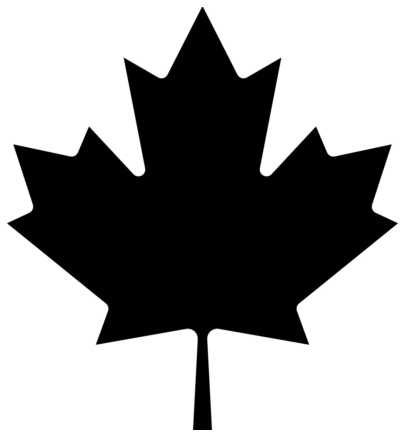

In [21]:
mapleLeaf_mask = np.array(Image.open('../input/resource/maple_leaf.jpeg'))
fig = plt.figure()
fig.set_figwidth(7) # set width
fig.set_figheight(9) # set height

plt.imshow(mapleLeaf_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

<p>We now have to generate a sample text data from our immigration dataset.</p>
<p>For simplicity, we can use countries with single-word names, and duplicate each country's name based on how much they contribute to the total immigration :</p>

In [22]:
total_immigration = df['Total'].sum()

df.set_index('Country', inplace=True)

max_words = 1000
word_string = ''
for country in df.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

We can now plot the WordCloud inside the mapple leaf mask :

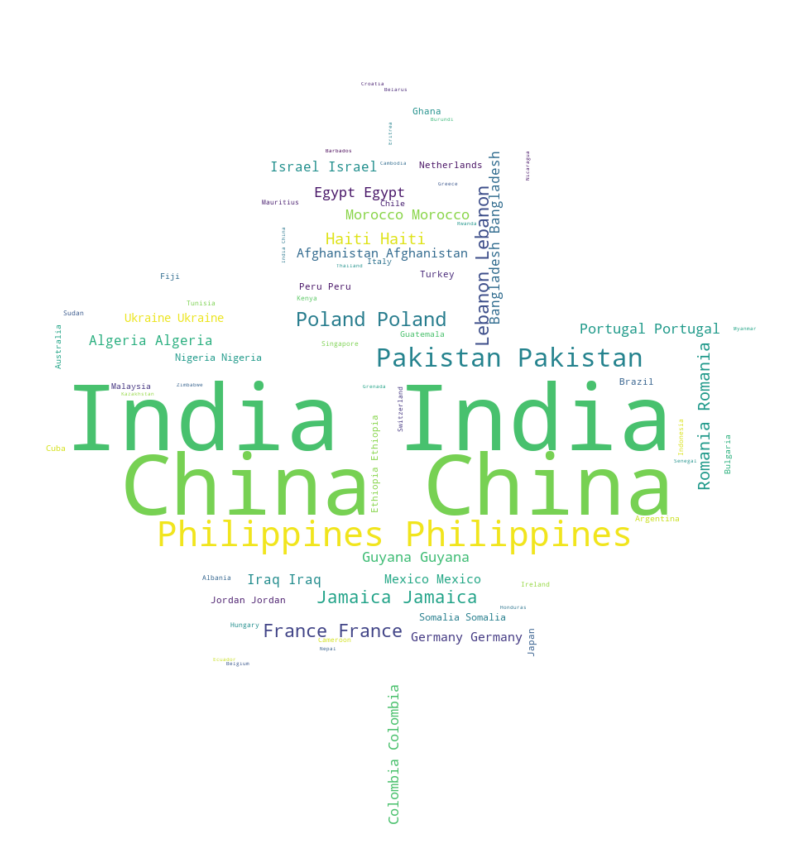

In [23]:
# instantiate a word cloud object
canada_wc = WordCloud(background_color='white', mask=mapleLeaf_mask)

# generate the word cloud
canada_wc.generate(word_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(canada_wc, interpolation='bilinear')
plt.axis('off')
plt.show()